In [1]:
! rm -rf NE591-008-Monorepo && git clone https://github.com/arjun372/NE591-008-Monorepo.git

# Directory containing the JSON files
json_dir = 'NE591-008-Monorepo/src/project/project3/analysis'

Cloning into 'NE591-008-Monorepo'...
remote: Enumerating objects: 36020, done.
remote: Counting objects: 100% (3589/3589), done.
remote: Compressing objects: 100% (1278/1278), done.
remote: Total 36020 (delta 2226), reused 2764 (delta 1745), pack-reused 32431
Receiving objects: 100% (36020/36020), 53.71 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (25991/25991), done.


In [2]:
import json
import os
import matplotlib.pyplot as plt

# Directory containing the JSON files
#json_dir = 'runs'

# Filenames and corresponding mesh sizes
file_mesh_sizes = ['2x2', '4x4', '8x8', '16x16', '32x32', '64x64']

# Methods to extract data for
methods = ['LUP', 'point-jacobi', 'SORJ', 'gauss-seidel', 'SOR', 'SSOR']

residuals = {method: [] for method in methods}
execution_times = {method: [] for method in methods}
uncertainties = {method: {'lower': [], 'upper': []} for method in methods}
max_memory = {method: [] for method in methods}

# Iterate over each file in the order of mesh sizes
for mesh_size in file_mesh_sizes:
    filename = f'{mesh_size}.json'
    file_path = os.path.join(json_dir, filename)
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Extract max-residual for each method and store it
        for method in methods:
            residuals[method].append(data['outputs'][method]['max-residual'])
            mean_time = data['outputs'][method]['wall-time-ns']['mean']
            p5th_time = data['outputs'][method]['wall-time-ns']['p5th']
            p95th_time = data['outputs'][method]['wall-time-ns']['p95th']
            execution_times[method].append(mean_time)
            uncertainties[method]['lower'].append(mean_time - p5th_time)
            uncertainties[method]['upper'].append(p95th_time - mean_time)
            # Convert bytes to kilobytes (1 KB = 1024 bytes)
            max_memory_kb = data['outputs'][method]['max-bytes'] / 1024
            max_memory[method].append(max_memory_kb)

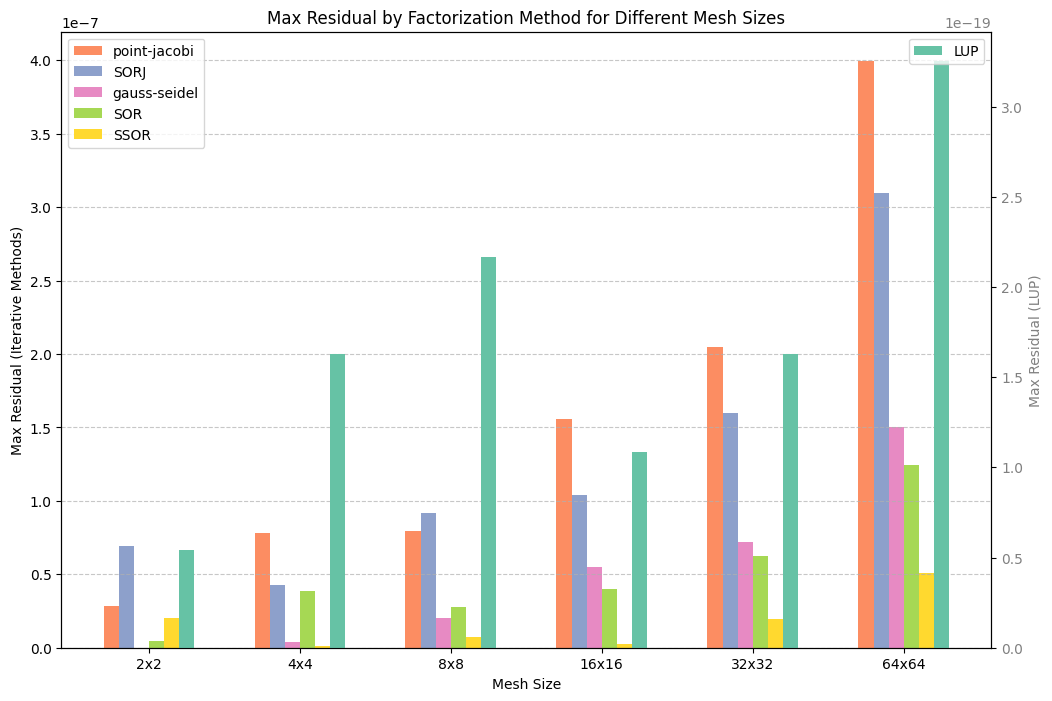

In [3]:
import numpy as np
# Number of mesh sizes
num_mesh_sizes = len(file_mesh_sizes)

# Assuming residuals is a dictionary with the max-residual values for each method
# and file_mesh_sizes is a list of mesh size labels

# Set up the figure and axes for the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set the positions of the bars on the x-axis
index = np.arange(len(file_mesh_sizes))
bar_width = 0.1  # Width of the bars
color_palette = plt.get_cmap('Set2')

# Create a secondary y-axis for the LUP method
ax2 = ax1.twinx()

# Plot LUP values on the secondary y-axis
methods_without_LUP = [method for method in methods if method != 'LUP']
ax2.bar(index + len(methods_without_LUP) * bar_width, residuals['LUP'], bar_width, label='LUP', color=color_palette(0))


# Plot bars for each method except LUP
for i, method in enumerate(methods_without_LUP):
    ax1.bar(index + i * bar_width, residuals[method], bar_width, label=method, color=color_palette(i+1))


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Mesh Size')
ax1.set_ylabel('Max Residual (Iterative Methods)')
ax2.set_ylabel('Max Residual (LUP)', color='grey')
ax1.set_title('Max Residual by Factorization Method for Different Mesh Sizes')
ax1.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax1.set_xticklabels(file_mesh_sizes)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set the color of the LUP y-axis to match the LUP bars
ax2.tick_params(axis='y', labelcolor='grey')

# Add a grid behind the bars
ax1.grid(True, linestyle='--', which='major', axis='y', alpha=0.7)

# Show the plot
plt.show()
#from google.colab import files
#plt.savefig('max_residual_plot.svg', format='svg', dpi=300, bbox_inches='tight')
#plt.show()
#files.download('max_residual_plot.svg')

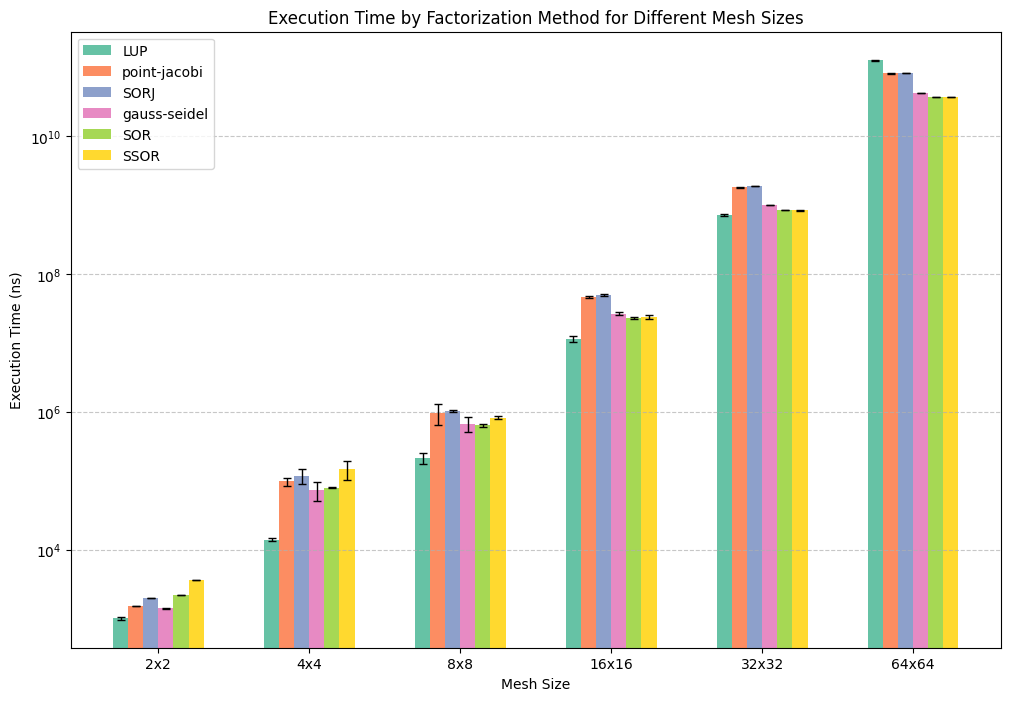

In [4]:
# Set up the figure and axes for the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the positions of the bars on the x-axis
index = np.arange(num_mesh_sizes)
bar_width = 0.1  # Width of the bars
color_palette = plt.get_cmap('Set2')

# Plot bars with error bars for each method
for i, method in enumerate(methods):
    # Calculate the symmetric error bars as the maximum of the lower and upper uncertainties
    symmetric_errors = np.maximum(uncertainties[method]['lower'], uncertainties[method]['upper'])
    ax.bar(index + i * bar_width, execution_times[method], bar_width, label=method,
           yerr=symmetric_errors,
           color=color_palette(i),  # Use the color palette for bars
           error_kw={'elinewidth': 1, 'ecolor': 'black', 'capsize': 3})

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_xlabel('Mesh Size')
ax.set_ylabel('Execution Time (ns)')
ax.set_title('Execution Time by Factorization Method for Different Mesh Sizes')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(file_mesh_sizes)
ax.legend()

# Add a grid behind the bars
ax.grid(True, linestyle='--', which='major', axis='y', alpha=0.7)
plt.show()

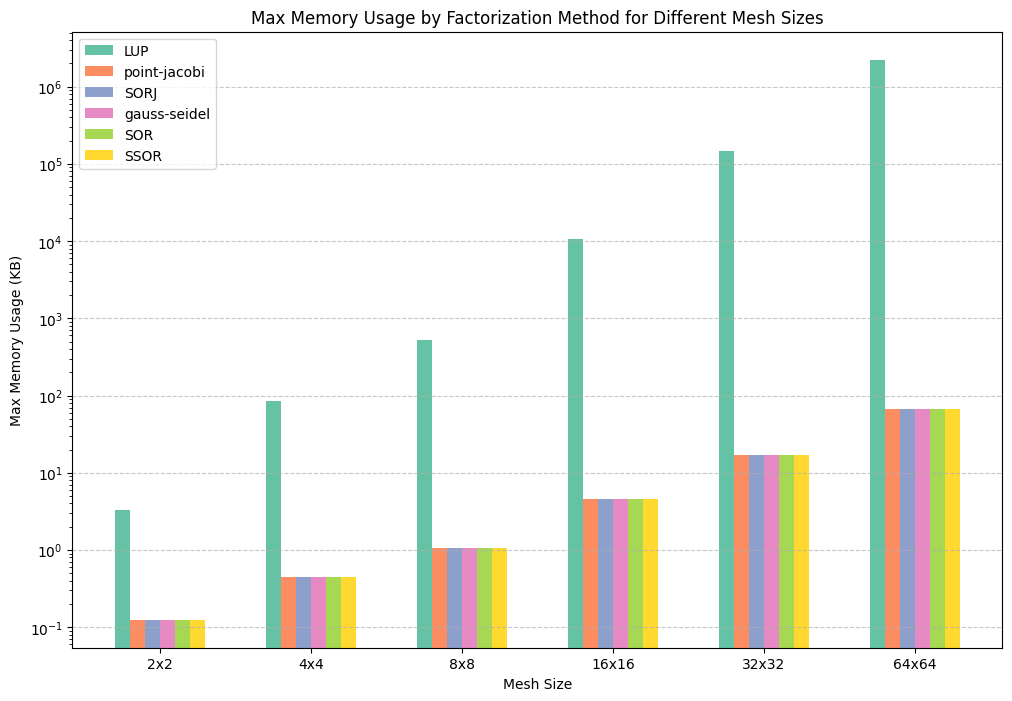

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Set up the figure and axes for the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the positions of the bars on the x-axis
index = np.arange(num_mesh_sizes)
bar_width = 0.1  # Width of the bars
color_palette = plt.get_cmap('Set2')

# Plot bars for each method
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, max_memory[method], bar_width, label=method, color=color_palette(i))

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_xlabel('Mesh Size')
ax.set_ylabel('Max Memory Usage (KB)')
ax.set_title('Max Memory Usage by Factorization Method for Different Mesh Sizes')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(file_mesh_sizes)
ax.legend()

# Add a grid behind the bars
ax.grid(True, linestyle='--', which='major', axis='y', alpha=0.7)

# Show the plot
#plt.tight_layout()
#plt.show()

#from google.colab import files
#plt.savefig('memory_usage_plot.svg', format='svg', dpi=300, bbox_inches='tight')
#plt.show()
#files.download('memory_usage_plot.svg')